In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv

IMG_DIRECTORY = "./../sst_images/"
WATER_PACF = 115017
WATER_ASIA = 142007
WATER_AUST = 74688
WATER = [WATER_PACF,WATER_ASIA,WATER_AUST]
MONTHS = ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [2]:
def get_avg_temp(image,ocen):
    uniq, counts = np.unique(image,return_counts = True)
    temp_grad = np.linspace(0,30,len(counts)-1)
    temp = 0
    for i in range(1,len(counts)):
        temp = temp + (counts[i]*temp_grad[i-1])/WATER[ocen]
    
    return round(temp,2)
    

In [41]:
temp_pacific = []
temp_asia = []
temp_austr = []
dates = []
for year in range(1985,2021):
    for month in range(1,13):
        image = cv2.imread(IMG_DIRECTORY + str(year)+"-"+str(month)+"-1.png",0)
        dates.append(MONTHS[month]+"-"+str(year))
        cropped_image  = image[79:569,164:1154]
        pacific = cropped_image[:,500:800]
        asia = cv2.hconcat([cropped_image[:,800:-5],cropped_image[:,:280]])
        austrilia = cropped_image[:,280:500]
        pac = get_avg_temp(pacific,0)
        asi = get_avg_temp(asia,1)
        aust = get_avg_temp(austrilia,2)
        # print(pac,asi,aust)
        temp_pacific.append(pac)
        temp_asia.append(asi)
        temp_austr.append(aust)


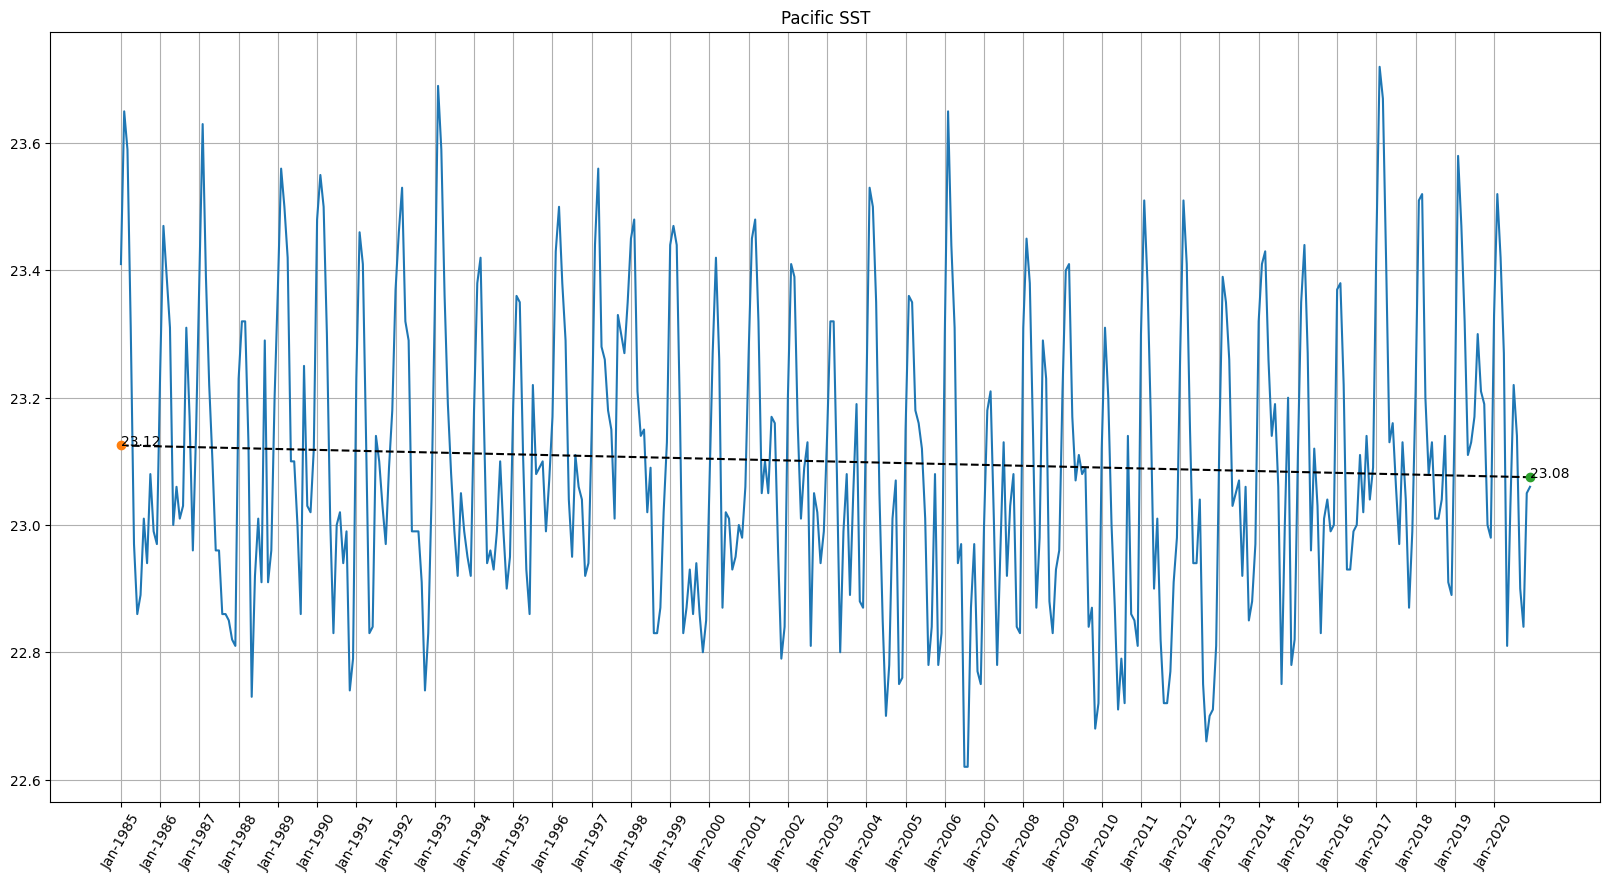

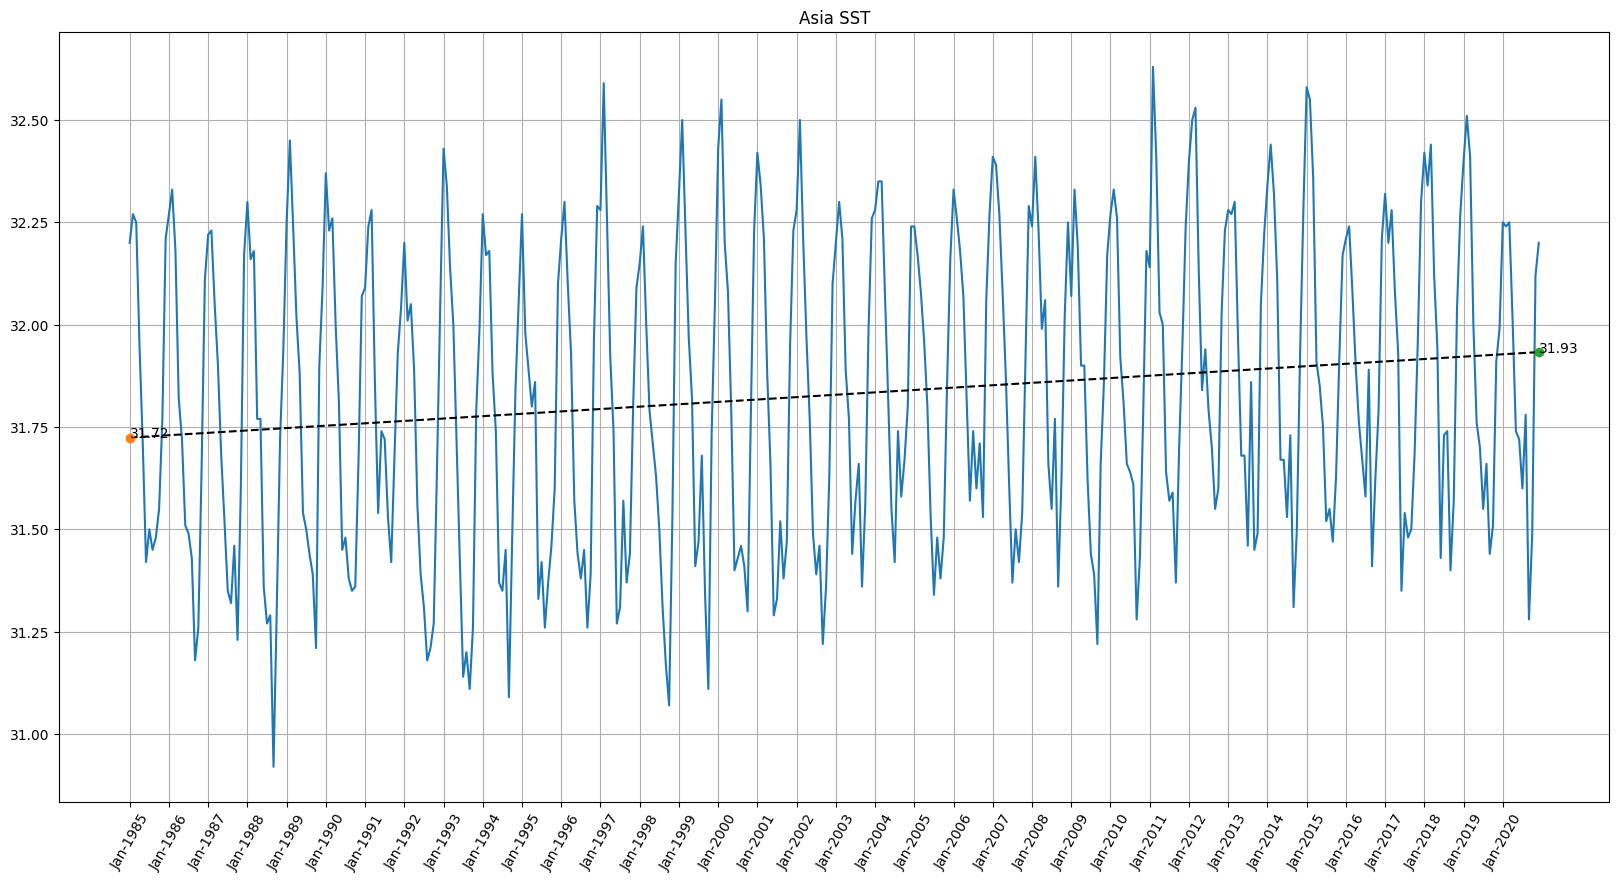

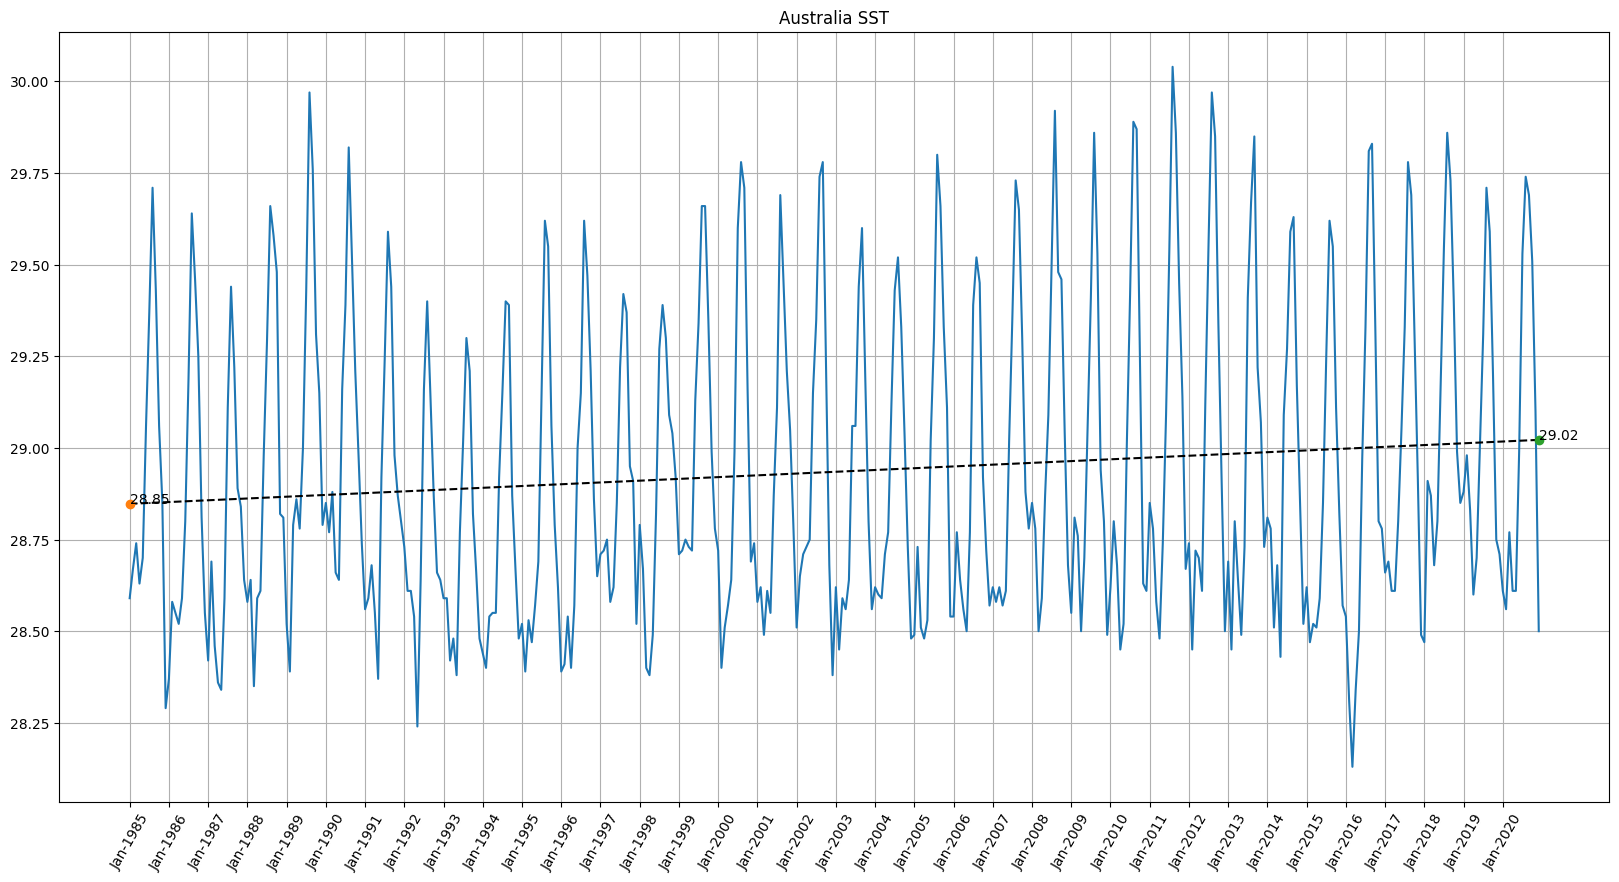

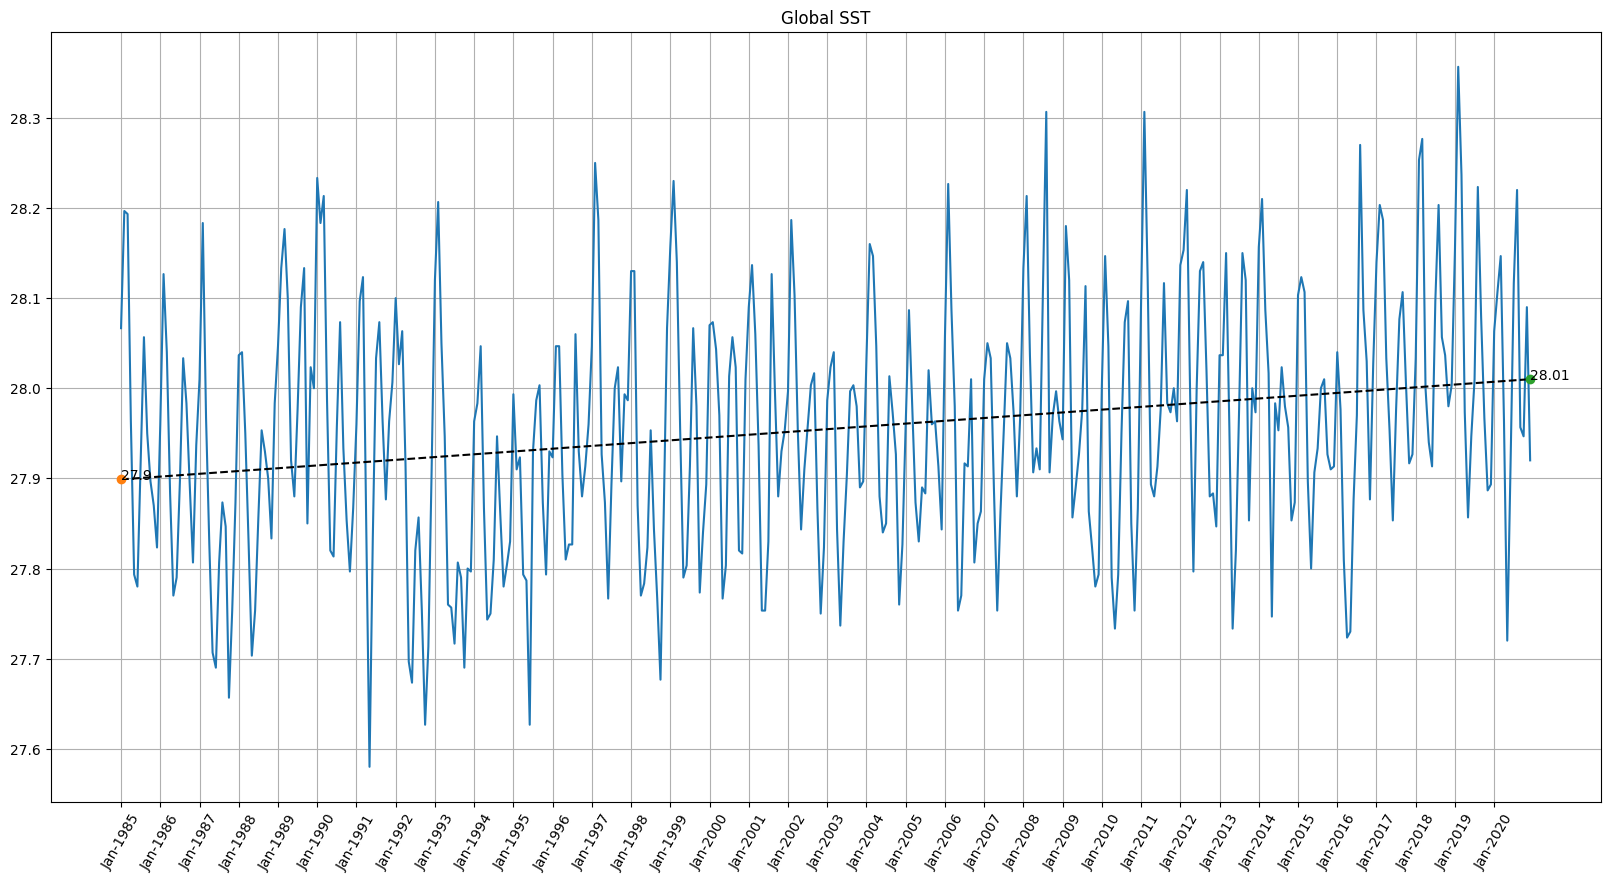

In [42]:
temp_global = np.divide(np.add(np.add(temp_austr,temp_asia),temp_pacific),3)
coef_pac = np.polyfit(range(len(dates)), temp_pacific, 1)
coef_aisa = np.polyfit(range(len(dates)), temp_asia, 1)
coef_aust = np.polyfit(range(len(dates)), temp_austr, 1)
coef = np.polyfit(range(len(dates)), temp_global, 1)

poly1d_fn_pac = np.poly1d(coef_pac) 
poly1d_fn_asia = np.poly1d(coef_aisa) 
poly1d_fn_aust = np.poly1d(coef_aust) 
poly1d_fn = np.poly1d(coef) 

freq_x = 12

plt.figure(figsize=(20,10))
plt.title("Pacific SST")
plt.plot(dates, temp_pacific,range(len(dates)), poly1d_fn_pac(range(len(dates))), '--k')
x,y = (dates[0],poly1d_fn_pac(range(len(dates)))[0])
plt.plot(x,y,'-o')
plt.annotate(str(round(y,2)),xy=(x,y))
x,y = (dates[-1],poly1d_fn_pac(range(len(dates)))[-1])
plt.plot(x,y,'-o')
plt.annotate(str(round(y,2)),xy=(x,y))
plt.grid(True)
plt.xticks(np.arange(0, len(dates), freq_x),rotation=60)

plt.figure(figsize=(20,10))
plt.title("Asia SST")
plt.plot(dates, temp_asia,range(len(dates)), poly1d_fn_asia(range(len(dates))), '--k')
x,y = (dates[0],poly1d_fn_asia(range(len(dates)))[0])
plt.plot(x,y,'-o')
plt.annotate(str(round(y,2)),xy=(x,y))
x,y = (dates[-1],poly1d_fn_asia(range(len(dates)))[-1])
plt.plot(x,y,'-o')
plt.annotate(str(round(y,2)),xy=(x,y))
plt.grid(True)
plt.xticks(np.arange(0, len(dates), freq_x),rotation=60)


plt.figure(figsize=(20,10))
plt.title("Australia SST")
plt.plot(dates, temp_austr,range(len(dates)), poly1d_fn_aust(range(len(dates))), '--k')
x,y = (dates[0],poly1d_fn_aust(range(len(dates)))[0])
plt.plot(x,y,'-o')
plt.annotate(str(round(y,2)),xy=(x,y))
x,y = (dates[-1],poly1d_fn_aust(range(len(dates)))[-1])
plt.plot(x,y,'-o')
plt.annotate(str(round(y,2)),xy=(x,y))
plt.grid(True)
plt.xticks(np.arange(0, len(dates), freq_x),rotation=60)


plt.figure(figsize=(20,10))
plt.title("Global SST")
plt.plot(dates, temp_global,range(len(dates)), poly1d_fn(range(len(dates))), '--k')
x,y = (dates[0],poly1d_fn(range(len(dates)))[0])
plt.plot(x,y,'-o')
plt.annotate(str(round(y,2)),xy=(x,y))
x,y = (dates[-1],poly1d_fn(range(len(dates)))[-1])
plt.plot(x,y,'-o')
plt.annotate(str(round(y,2)),xy=(x,y))
plt.grid(True)
plt.xticks(np.arange(0, len(dates), freq_x),rotation=60)


plt.show()

In [43]:
with open(f'pacific_sst.csv','w',) as myfile:
    wr = csv.writer(myfile)
    wr.writerow(["Date","Temp"])
    for i in range(len(dates)):
        wr.writerow([dates[i],temp_pacific[i]])

with open(f'asia_sst.csv','w',) as myfile:
    wr = csv.writer(myfile)
    wr.writerow(["Date","Temp"])
    for i in range(len(dates)):
        wr.writerow([dates[i],temp_asia[i]])

with open(f'aust_sst.csv','w',) as myfile:
    wr = csv.writer(myfile)
    wr.writerow(["Date","Temp"])
    for i in range(len(dates)):
        wr.writerow([dates[i],temp_austr[i]])

with open(f'global_sst.csv','w',) as myfile:
    wr = csv.writer(myfile)
    wr.writerow(["Date","Temp"])
    for i in range(len(dates)):
        wr.writerow([dates[i],temp_global[i]])


In [44]:
temp = []
for year in range(1985,2021):
    for month in range(1,13):
        image = cv2.imread(IMG_DIRECTORY + str(year)+"-"+str(month)+"-1.png",0)
        cropped_image = image[79:569,164:1154]
        # print(year,month)
        temp.append(cropped_image)

out = np.sum(temp,axis=0)
print(out.shape)
        

(490, 990)


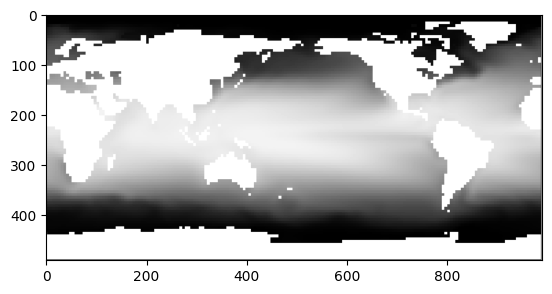

In [45]:

plt.imshow(out,cmap='gray')